# Principais distribuições de probabilidade

Muitas ferramentas e técnicas estatísticas utilizadas na análise de dados são baseadas em probabilidade. A probabilidade mede a probabilidade de um evento ocorrer em uma escala de 0 (o evento nunca ocorre) a 1 (o evento sempre ocorre). Ao trabalhar com dados, as variáveis ​​nas colunas do conjunto de dados podem ser consideradas variáveis ​​aleatórias: variáveis ​​que variam devido ao acaso. Uma  distribuição de probabilidade  descreve como uma variável aleatória é distribuída; ela nos diz quais valores uma variável aleatória tem maior probabilidade de assumir e quais valores são menos prováveis.

Na estatística, há uma série de distribuições de probabilidade definidas com precisão que possuem diferentes formatos e podem ser usadas para modelar diferentes tipos de eventos aleatórios.

Neste notebook, consta um resumo sobre algumas distribuições de probabilidade comuns e como trabalhar com elas em Python.

# A Distribuição Uniforme

A  distribuição uniforme  é  uma distribuição de probabilidade em que cada valor dentro de um determinado intervalo tem a mesma probabilidade de ocorrer e valores fora do intervalo nunca ocorrem.
Se fizermos um gráfico de densidade de uma distribuição uniforme, ele parecerá plano porque nenhum valor é mais provável (e, portanto, não tem mais densidade) do que outro.
Muitas funções úteis para trabalhar com distribuições de probabilidade em Python estão contidas na biblioteca scipy.stats. Vamos carregar algumas bibliotecas, gerar alguns dados uniformes e traçar uma curva de densidade:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
import random

In [2]:
uniform_data = stats.uniform.rvs(size=100000,  # Gerar 100000 números
                                 loc = 0,      # de 0
                                 scale=10)     # até 10

<Axes: ylabel='Density'>

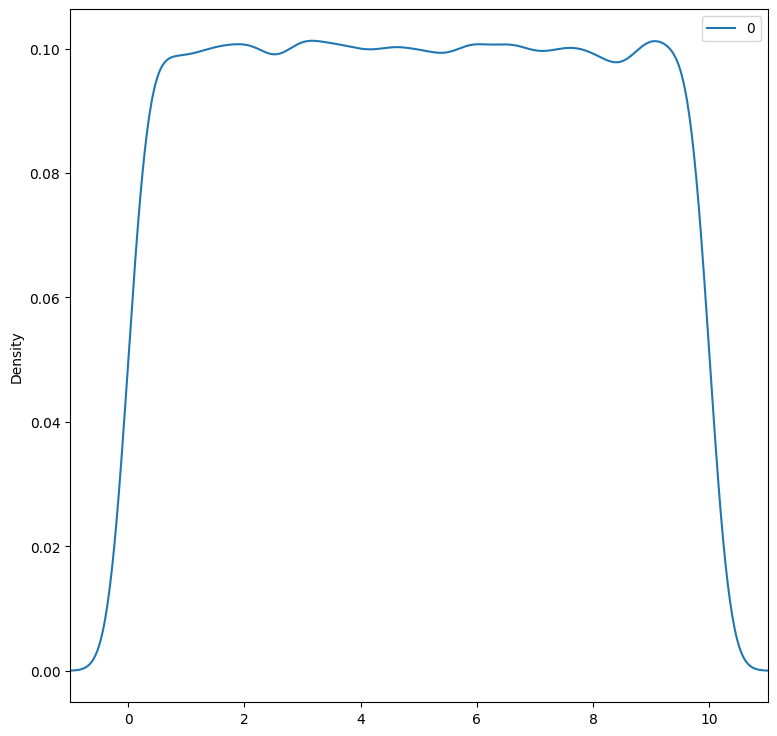

In [3]:
pd.DataFrame(uniform_data).plot(kind="density",  # Traçar a distribuição
                               figsize=(9,9),
                               xlim=(-1,11))

- **Observações:**

  - O gráfico acima é uma aproximação da distribuição subjacente, uma vez que se baseia numa amostra de observações. No código acima, geramos 100.000 pontos de dados a partir de uma distribuição uniforme que abrange o intervalo de 0 a 10. No gráfico de densidade, vemos que a densidade de nossos dados uniformes é essencialmente nivelada, o que significa que qualquer valor dado tem a mesma probabilidade de ocorrer. A área sob uma curva de densidade de probabilidade é sempre igual a 1.
 - As distribuições de probabilidade no scipy vêm com várias funções úteis para gerar dados aleatórios e extrair valores de interesse:
 - *stats.distribution.rvs()* gera números aleatórios da distribuição especificada. Os argumentos para rvs() irão variar dependendo do tipo de distribuição com a qual você está trabalhando; no caso da distribuição uniforme, temos que especificar os pontos inicial e final e o tamanho (número de pontos aleatórios a serem gerados).
 - *stats.distribution.cdf()* é usado para determinar a probabilidade de uma observação extraída de uma distribuição cair abaixo de um valor especificado ( conhecido como  função de distribuição cumulativa ). Em essência, cdf() fornece a área sob a curva de densidade da distribuição à esquerda de um determinado valor no eixo x. Por exemplo, na distribuição uniforme acima, há 25% de chance de uma observação estar no intervalo de 0 a 2,5 e 75% de chance de cair no intervalo de 2,5 a 10. Podemos confirmar isso com cdf():

In [5]:
stats.uniform.cdf(x=2.5,         # Valor de corte (quantil) para verificar
                  loc=0,         # Início da distribuição
                  scale=10)      # Fim da distribuição

0.25

- *stats.distribution.ppf()* é o inverso de cdf(): retorna o valor de corte do eixo x (quantil) associado a uma determinada probabilidade. Por exemplo, se quisermos saber o valor de corte para o qual temos 40% de chance de obter uma observação abaixo desse valor, podemos usar ppf():

In [6]:
stats.uniform.ppf(q=0.4,         # Probabilidade de corte
                  loc=0,         # Início da distribuição
                  scale=10)      # Fim da distribuição

4.0


 - *stats.distribution.pdf()* fornece a densidade de probabilidade (altura da distribuição) em um determinado valor de x. Como a distribuição uniforme é plana, todos os valores de x dentro do seu intervalo terão a mesma densidade de probabilidade e os valores de x fora do intervalo terão uma densidade de probabilidade de 0:

In [7]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


As funções de distribuição de probabilidade no scipy também suportam mediana(), média(), var() e std().

## Gerando números aleatórios e definindo a semente
Quando for necessário gerar números reais aleatórios em um intervalo com igual probabilidade, é possível extrair números de uma distribuição uniforme usando *stats.distribution.rvs()*. Python também vem com uma biblioteca chamada “random” que permite realizar várias operações que envolvem randomização. Vejamos algumas funções na biblioteca aleatória:

In [9]:
random.randint(0,10)     # Obtém um número inteiro aleatório no intervalo especificado

10

In [10]:
random.choice([2,4,6,9])  # Obtém um elemento aleatório de uma sequência

4

In [11]:
random.random()          # Obtém um número real entre 0 e 1

0.43696849269114346

In [12]:
random.uniform(0,10)     # # Obtém um real no intervalo especificado

7.274119975441163

Observe que a biblioteca aleatória também permite gerar números uniformes aleatórios. Independentemente do método usado para gerar números aleatórios, o resultado de um processo aleatório pode diferir de uma execução para outra.

Fazer com que os resultados variem cada vez que você executa uma função geralmente não é desejável. Por exemplo, se você deseja que um colega seja capaz de reproduzir seus resultados com exatidão, poderá ter problemas ao usar a randomização. Você pode garantir que seus resultados sejam os mesmos sempre que usar uma função que envolva aleatoriedade, definindo o valor inicial do gerador de números aleatórios para inicializá-lo antes de executar a função. Defina a semente aleatória com *random.seed()*:

In [18]:
print([random.uniform(0,10) for x in range(4)]) # sems semente

[6.905926530386846, 6.014570387277331, 5.58190047753348, 6.61321085872001]


In [16]:
random.seed(12)  # Define a semente com um valor arbitrário

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


Sem atribuir um valor de semente, obtemos números diferentes. Esta reprodutibilidade ilustra o fato de que esses números aleatórios não são verdadeiramente aleatórios,  mas sim " pseudoaleatórios ".
Muitas funções nas bibliotecas Python que usam aleatoriedade têm um argumento de semente aleatório opcional incorporado para que você não precise definir a semente fora da função. Por exemplo, a função rvs() possui um argumento opcional *random_state*, que permite definir a semente.

- **Observação:**
 - A biblioteca padrão do Python "random" possui uma semente interna separada da biblioteca numpy. Ao usar funções de numpy e bibliotecas construídas sobre numpy (pandas, scipy, scikit-learn), use ***np.random.seed()*** para definir a semente.

# Distribuição normal
A distribuição normal ou  gaussiana  é uma distribuição de probabilidade contínua caracterizada por uma curva simétrica em forma de sino. Uma distribuição normal é definida por seu centro (média) e dispersão (desvio padrão).

A maior parte das observações geradas a partir de uma distribuição normal fica perto da média, que fica exatamente no centro da distribuição: como regra geral, cerca de 68% dos dados estão dentro de 1 desvio padrão da média, 95% estão dentro de 2 desvio padrão da média e 99,7% estão dentro de 3 desvios padrão.

A distribuição normal é talvez a distribuição mais importante em todas as estatísticas. Acontece que muitos fenômenos do mundo real seguem aproximadamente uma distribuição normal, por isso é frequentemente usado para modelar variáveis ​​aleatórias. Muitos testes estatísticos comuns assumem que as distribuições são normais.
Na biblioteca scipy, a chamada para a distribuição normal é ***norm***. Vamos investigar a distribuição normal:

In [19]:
prob_under_minus1 = stats.norm.cdf(x= -1,
                                loc = 0,
                                scale= 1)

prob_over_1 = 1 - stats.norm.cdf(x= 1,
                                loc = 0,
                                scale= 1)

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


O resultado mostra que cerca de 16% dos dados gerados por uma distribuição normal com média 0 e desvio padrão 1 estão abaixo de -1, 16% estão acima de 1 e 68% estão entre -1 e 1, o que concorda com 68, 95, Regra 99,7. Vamos traçar a distribuição normal e inspecionar as áreas que calculamos:

Text(1.4, 0.03, '0.159')

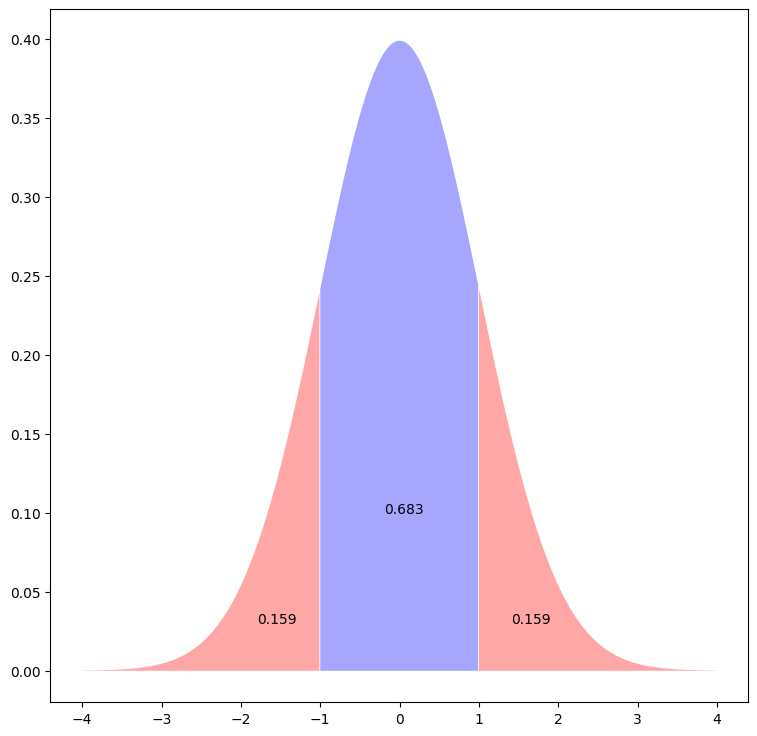

In [20]:
# Plotar áreas de distribuição normal

plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

- **Observação:**
 - O gráfico acima mostra o formato de sino da distribuição normal, a área abaixo e acima de um desvio padrão e a área dentro de 1 desvio padrão da média.
Encontrar quantis da distribuição normal é uma tarefa comum na realização de testes estatísticos. Você pode verificar os quantis de distribuição normal com *stats.norm.ppf()*:

In [21]:
print( stats.norm.ppf(q=0.025) ) # Encontre o quantil para o corte de 2,5%

print( stats.norm.ppf(q=0.975) ) # Encontre o quantil para o ponto de corte de 97,5%

-1.9599639845400545
1.959963984540054



O resultado do quantil acima confirma que cerca de 5% dos dados estão a mais de 2 desvios padrão da média.
- **Observação:**
 - uma média de 0 e um desvio padrão de 1 são valores padrão para a distribuição normal.

# Distribuição binomial
A  distribuição binomial  é uma  distribuição de probabilidade discreta que modela os resultados de um determinado número de sequencias aleatórias de algum experimento ou evento.

A binomial é definida por dois parâmetros: a probabilidade de sucesso em qualquer tentativa e o número de tentativas.

Essa distribuição informa a probabilidade de obter um determinado número de sucessos em n tentativas do experimento. Por exemplo, poderíamos modelar o lançamento de uma moeda honesta 10 vezes com uma distribuição binomial onde o número de tentativas é definido como 10 e a probabilidade de sucesso é definida como 0,5. Neste caso, a distribuição nos diria qual a probabilidade de obter zero caras, 1 cara, 2 caras e assim por diante.

Na biblioteca scipy, a chamada para a distribuição binomial é ***binom***. Vamos gerar e investigar alguns dados binomiais:

col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts   8  102  410  1224  2068  2488  2004  1178  404  102  12


array([[<Axes: title={'center': '0'}>]], dtype=object)

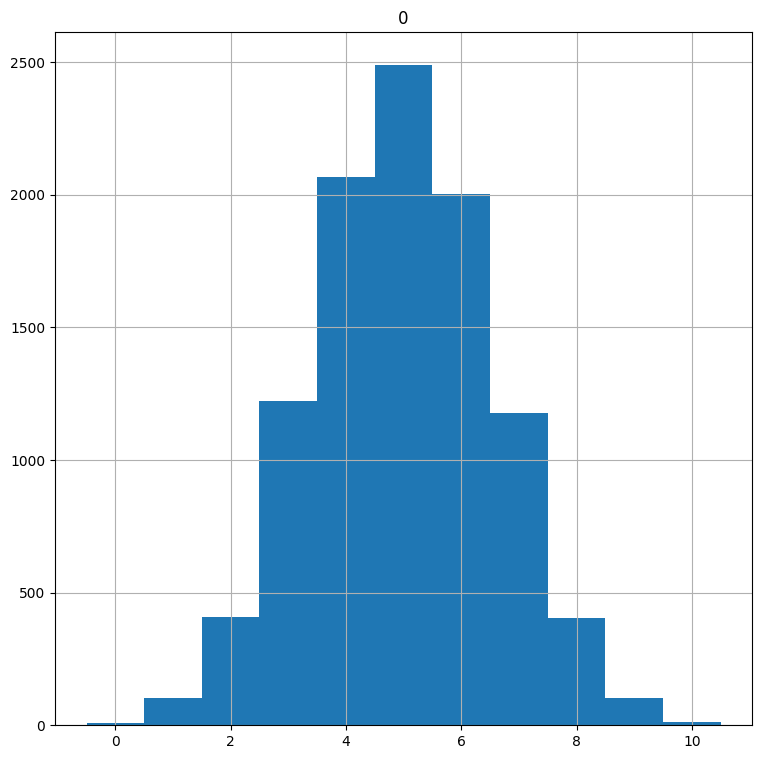

In [22]:
fair_coin_flips = stats.binom.rvs(n=10,        # Número de lançamentos por tentativa
                                  p=0.5,       # Probabilidade de sucesso
                                  size=10000)  # Número de tentativas

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

Observe que como a distribuição binomial é discreta, ela assume apenas valores inteiros, portanto podemos resumir os dados binomiais com uma tabela de frequência e sua distribuição com um histograma.

O histograma mostra-nos que uma distribuição binomial com 50% de probabilidade de sucesso é aproximadamente simétrica, com os resultados mais prováveis ​​situados no centro. Isto lembra a distribuição normal, mas se alterarmos a probabilidade de sucesso, a distribuição não será simétrica:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   9  63  238  901  2055  2996  2677  1061


array([[<Axes: title={'center': '0'}>]], dtype=object)

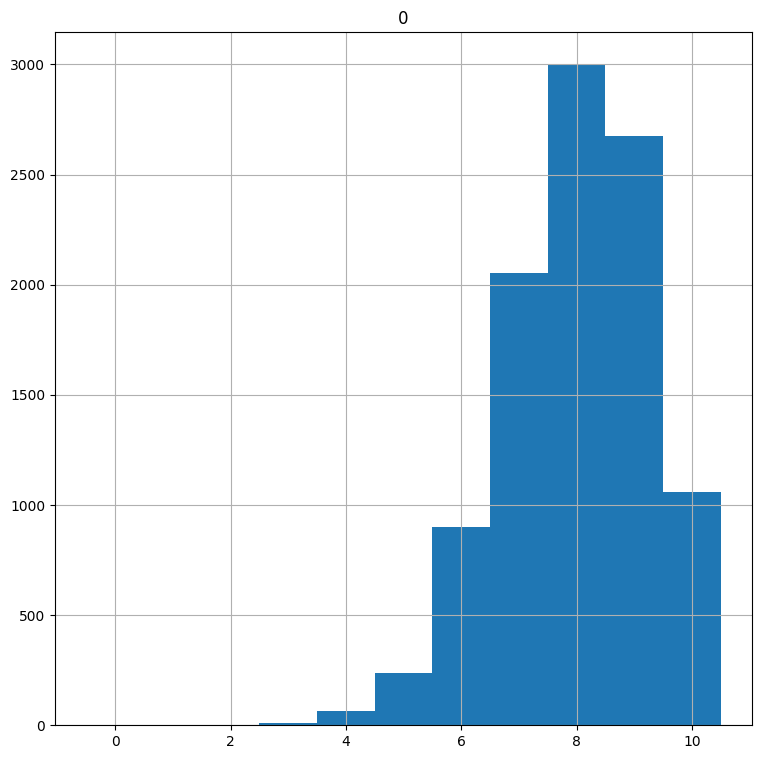

In [23]:
biased_coin_flips = stats.binom.rvs(n=10,      # Número de lançamentos por tentativa
                                  p=0.8,       # Probabilidade de sucesso
                                  size=10000)  # Número de tentativas

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

A função cdf() nos permite verificar a probabilidade de obter um número de sucessos dentro de um determinado intervalo:

In [24]:
stats.binom.cdf(k=5,        # Probabilidade de k = 5 sucessos ou menos
                n=10,       # Com 10 lançamentos
                p=0.8)      # E probabilidade de sucesso 0,8

0.03279349759999997

In [25]:
1 - stats.binom.cdf(k=8,        # Probabilidade de k = 9 sucessos ou mais
                    n=10,       # Com 10 lançamentos
                    p=0.8)      # E probabilidade de sucesso 0,8

0.37580963840000015

Para funções de densidade de probabilidade contínua, usamos pdf() para verificar a densidade de probabilidade em um determinado valor de x.

Para distribuições discretas como a binomial, usamos stats.distribution.pmf() (função de massa de probabilidade) para verificar a massa (proporção de observações) em um determinado número de sucessos k:

In [27]:
stats.binom.pmf(k=5,        # Probabilidade de k = 5 sucessos
                n=10,       # Com 10 lançamentos
                p=0.5)      # E probabilidade de sucesso 0,5

0.24609375000000003

In [28]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # Com 10 lançamentos
                p=0.8)      # E probabilidade de sucesso 0,8

0.30198988799999993

# Distribuições geométricas e exponenciais
As   distribuições  geométrica  e  exponencial modelam o tempo que leva para um evento ocorrer.

A distribuição geométrica é discreta e modela o número de tentativas necessárias para obter sucesso em experimentos repetidos com uma determinada probabilidade de sucesso.

A distribuição exponencial é um análogo contínuo da distribuição geométrica e modela a quantidade de tempo que você tem que esperar antes que um evento ocorra, dada uma determinada taxa de ocorrência.

## Distribuição geométrica
Na biblioteca scipy, a chamada para a distribuiçãoo geométrica é "geom". Vamos usar as funções geom para modelar o número de tentativas necessárias para obter sucesso (cara) ao lançar uma moeda justa:

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  4968  2589  1179  639  308  167  65  43  24   8   7   1   2


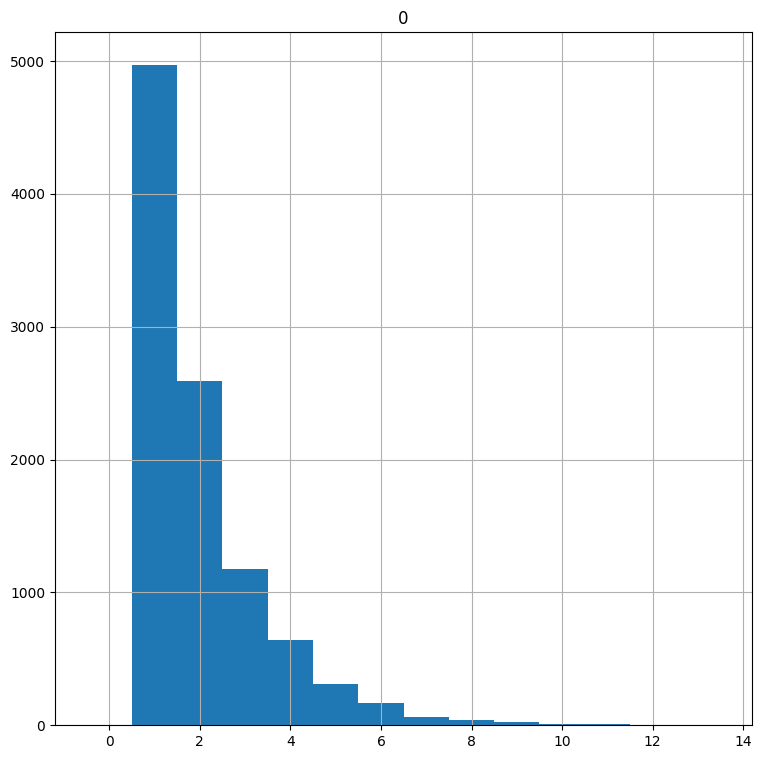

In [30]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Gera dados geométricos
                                  p=0.5)       # Com sucesso prob 0,5

# Imprimir tabela de contagens
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plotar histograma
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

A distribuição é semelhante ao que esperaríamos: é muito provável que se obtenha cara em 1 ou 2 lançamentos, enquanto é muito improvável que sejam necessárias mais de 5 lançamentos para obter cara. Nas 10.000 trilhas que geramos, o tempo mais longo necessário para obter cara foi de 13 lançamentos.
Vamos usar cdf() para verificar a probabilidade de precisar de 6 lançamentos ou mais para obter sucesso:

In [31]:
first_five = stats.geom.cdf(k=5,   # Prob de sucesso nas primeiras 5 jogadas
                           p=0.5)

1 - first_five

0.03125

Use pmf() para verificar a probabilidade de ver um número específico de lançamentos antes de um sucesso:

In [32]:
stats.geom.pmf(k=2,   # Probabilidade de precisar de exatamente 2 lançamentos para obter o primeiro sucesso
              p=0.5)

0.25

## Distribuição exponencial
Na biblioteca scipy, a chamada para a distribuiçãoo exponencial é "expon". Vamos investigar a distribuição exponencial:

In [33]:
# Obter a probabilidade de esperar mais de 1 unidade de tempo antes de obter sucesso

prob_1 = stats.expon.cdf(x=1,
                         scale=1)  # Taxa de chegada

1 - prob_1

0.36787944117144233

- **Observação:** O tempo médio de chegada para a distribuição exponencial é igual a 1/taxa_chegada.
Vamos traçar essa distribuição exponencial para ter uma ideia de sua forma:

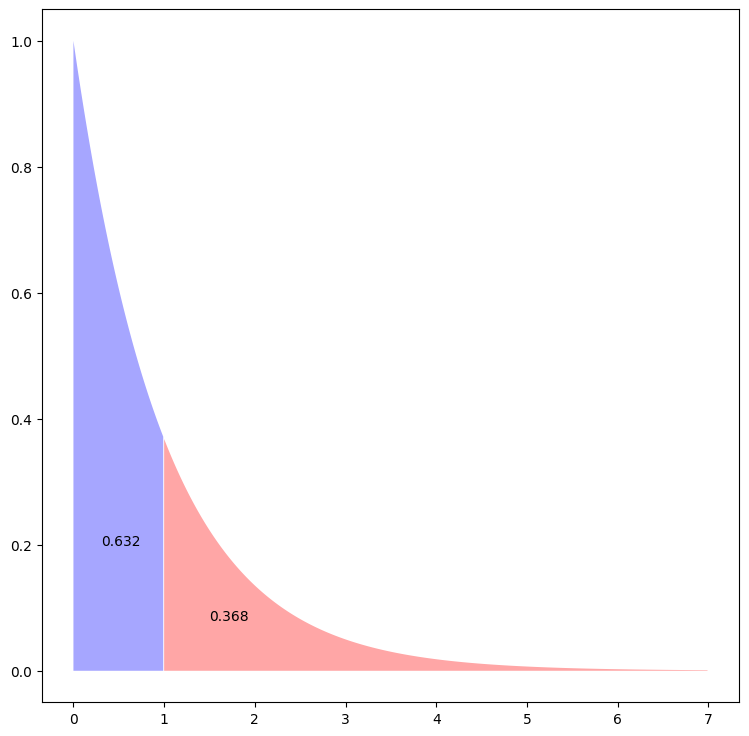

In [34]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

Semelhante à distribuição geométrica, a exponencial começa alta e tem uma longa cauda que segue para a direita, contendo casos raros em que é necessário esperar muito mais do que a média por uma chegada.

# Distribuição de Poisson
A  distribuição de Poisson  modela a probabilidade de haver um certo número de sucessos dentro de um intervalo de tempo, onde o tempo necessário para o próximo sucesso é modelado por uma distribuição exponencial.

A distribuição de Poisson pode ser usada para modelar o tráfego, como o número de chegadas que um hospital pode esperar dentro de uma hora ou o número de e-mails que você espera receber em uma semana.
N biblioteca scipy, a chamada para a distribuição de Poisson é "poisson". Vamos gerar e traçar alguns dados de uma distribuição de Poisson com taxa de chegada de 1 por unidade de tempo:

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3588  3743  1870  622  134  34  7  2


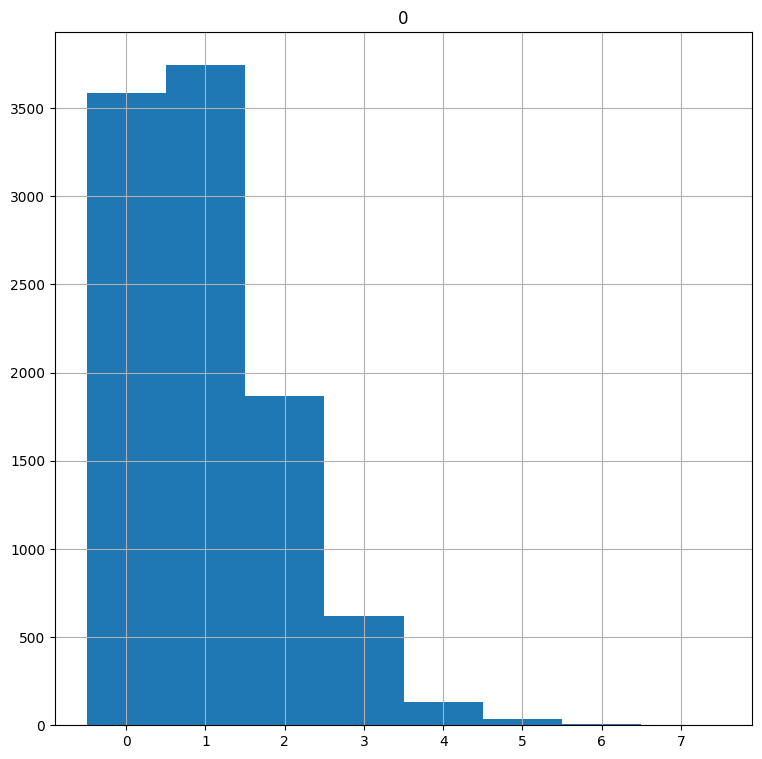

In [36]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Gera dados de Poisson
                                   mu=1 )       # Tempo médio de chegada 1

# Imprimir tabela de contagens

# Imprimir tabela de contagens
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plotar histograma
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

O histograma mostra que quando as chegadas são relativamente pouco frequentes, é raro ver mais do que algumas chegadas em cada período de tempo. Quando a taxa de chegada é elevada, torna-se cada vez mais raro ver um número baixo de chegadas e a distribuição começa a parecer mais simétrica:

col_0   0   1   2   3    4    5    6    7     8     9   ...   15   16   17  \
row_0                                                   ...                  
counts   1   9  23  78  181  350  603  923  1108  1257  ...  324  218  151   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  77  40  19   8   4   4   1  

[1 rows x 25 columns]


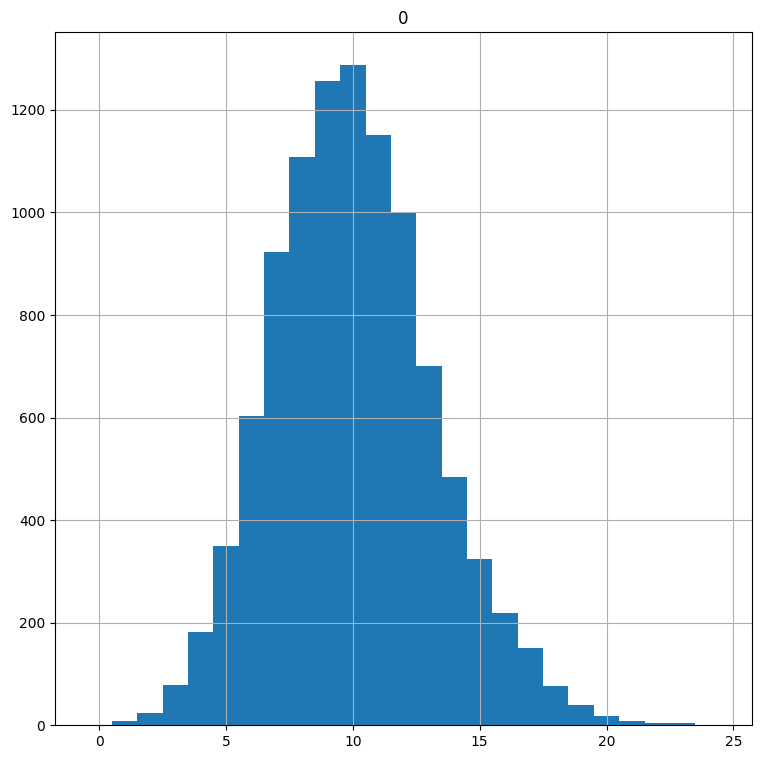

In [37]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Gera dados de Poisson
                                   mu=10 )       # Tempo médio de chegada 10

#Imprimir tabela de contagens
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plotar histograma
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

Tal como acontece com outras distribuições de probabilidade discretas, podemos usar cdf() para verificar a probabilidade de obter mais ou menos que um certo número de sucessos e pmf() para verificar a probabilidade de obter um número específico de sucessos:

In [38]:
stats.poisson.cdf(k=5,     # Verifique a probabilidade de 5 chegadas ou menos
                  mu=10)   # Com taxa de chegada 10

0.06708596287903189

In [39]:
stats.poisson.pmf(k=10,     # Verifique o problema f exatamente 10 chegadas
                  mu=10)    # Com taxa de chegada 10

0.12511003572113372

# Considerações finais
A biblioteca scipy do Python contém funções que facilitam o trabalho com uma ampla gama de distribuições de probabilidade, incluindo muitas que não utilizei aqui, mas s encontram na [documentação do scipy](https://docs.scipy.org/doc/scipy/reference/stats.html).

As funções de distribuição de probabilidade são úteis para gerar dados aleatórios, modelar eventos aleatórios e auxiliar em testes e análises estatísticas.